In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the training set
dataset_train=pd.read_csv("/content/drive/MyDrive/Deep Learning/RNN/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv")

In [3]:
dataset_train.shape

(1258, 6)

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Part - 1: Data Preprocessing

In [5]:
#Converting the data into numpy array
training_set=dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Feature Scaling
- For RNN it is recommended to apply the normalization method for normalization.
- Xnorm=(X-Xmin/Xmax-Xmin)

In [6]:
from sklearn.preprocessing import MinMaxScaler


In [7]:
sc=MinMaxScaler(feature_range=(0,1))

In [8]:
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating a data structure with 60 timesteps and 1 output

In [9]:
X_train=[]
y_train=[]

In [10]:
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [11]:
X_train,y_train=np.array(X_train),np.array(y_train) #Connverting list into array

In [12]:
X_train.shape

(1198, 60)

In [13]:
y_train.shape

(1198,)

## Reshaping the data

- To add new dimensions in the data

In [14]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # Batch size(no. of rows),timesteps(no. of columns),no. of indicators/predictors

In [15]:
X_train.shape

(1198, 60, 1)

# Part - 2 - Building The RNN

## Importing the Keras libraries and packages

In [16]:
import tensorflow as tf

In [17]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

## Initialising The RNN

In [18]:
regressor=Sequential()

## Adding the first LSTM layer and some Dropout regularization 

In [19]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))

In [20]:
regressor.add(Dropout(0.2))

## Adding a second LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

## Adding a *third* LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

## Adding a fourth LSTM layer and some Dropout regularisation

In [23]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

## Adding the output layer 

In [24]:
regressor.add(Dense(units=1))

## Compiling the RNN

In [25]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

## Fitting the RNN to the training set

In [28]:
X_train.shape,y_train.shape

((1198, 60, 1), (1198,))

In [29]:
regressor.fit(X_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0046
Epoch 2/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0042
Epoch 3/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0038
Epoch 4/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0040
Epoch 5/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0043
Epoch 7/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0039
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0034
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0035
Epoch 12/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0033
Epoch 13/100


# Part 3 - Making the predictions and visualizing the results

## Getting the real stock price of January 2017

In [30]:
dataset_test=pd.read_csv("/content/drive/MyDrive/Deep Learning/RNN/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv")
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [31]:
dataset_test.shape

(20, 6)

In [32]:
real_stock_price=dataset_test.iloc[:,1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

## Predicted stock price of January 2017

### Concatenate training and test set

In [34]:
dataset_total=pd.concat((dataset_train["Open"],dataset_test["Open"]),axis=0)
dataset_total.shape

(1278,)

In [35]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [36]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

### REshape the inputs

In [39]:
inputs=inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

### Scaling the inputs

In [40]:
inputs=sc.transform(inputs)

In [42]:
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])

In [43]:
X_test=np.array(X_test)

### 3d structure

In [45]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [46]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

### Predicting the stock price

In [47]:
predicted_stock_price=regressor.predict(X_test)

1/1 [==============================] - 2s 2s/step


### Inversing the scaling to see the real value of stocks

In [48]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[784.13293],
       [781.0214 ],
       [781.91895],
       [783.53674],
       [787.27264],
       [793.7091 ],
       [798.8019 ],
       [799.98206],
       [799.76855],
       [799.4925 ],
       [799.51416],
       [799.5745 ],
       [799.70044],
       [800.6124 ],
       [801.7594 ],
       [807.3685 ],
       [814.8331 ],
       [822.1863 ],
       [825.0143 ],
       [818.4253 ]], dtype=float32)

## Visualisation of the results

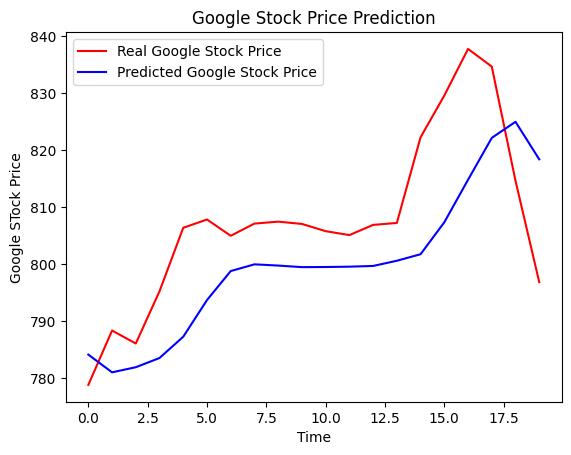

In [50]:
plt.plot(real_stock_price,color="red",label="Real Google Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google STock Price")
plt.legend()
plt.show()